Problem Statement: 5

Group 153

| SL.NO | BITS ID      | NAME                      | CONTRIBUTION |
|-------|-------------|---------------------------|--------------|
| 1     | 2024AA05731 | Suraj Anand               | 20%          |
| 2     | 2024AA05732 | Ashvini Satish Bhosale    | 20%          |
| 3     | 2024AA05733 | Bollam Manindra           | 20%          |
| 4     | 2024AA05734 | S. Hari Chandana          | 20%          |
| 5     | 2024AA05735 | Nikhil Yadav              | 20%          |


#Assumptions made:

1. Used lemmatization over stemming for better semantic preservation
2. Applied simple Lesk algorithm approach for WSD
3. Treated neutral sentiments as positive in binary classification
4. Used first synset as default when multiple senses available
5. Focused on English language processing only


#Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tag import pos_tag
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('sentiwordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

try:
    nltk.download('punkt_tab')
    print("punkt_tab downloaded successfully!")
except LookupError:
    print("Failed to download punkt_tab. Please check your internet connection or NLTK installation.")

print("All libraries imported successfully!")

punkt_tab downloaded successfully!
All libraries imported successfully!


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_d

#Dataset Analysis and SentiWordNet Implementation

In [ ]:
try:

    file_id = "1tI_EjLj6LZxY4hsXvbIqO2bJwL1kjfWp"
    url = f"https://drive.google.com/uc?id={file_id}"

    # Load dataset
    TEST_REVIEWS = pd.read_csv(url)
    print("Dataset loaded successfully!")

    # Display basic information about the dataset
    print("\n--- HEAD ---")
    print(TEST_REVIEWS.head())

    print("\n--- INFO ---")
    print(TEST_REVIEWS.info())

    print("\n--- DESCRIBE ---")
    print(TEST_REVIEWS.describe())

    print(f"\nDataset shape: {TEST_REVIEWS.shape}")
    print(f"Columns: {list(TEST_REVIEWS.columns)}")

except FileNotFoundError:
    print("Dataset file not found. Please download 'TestReviews.csv' ")


Dataset loaded successfully!

--- HEAD ---
                                              review  class
0  Fantastic spot for an even or a quite cocktail...      1
1  Love, love, love the calamari. It's so good an...      1
2  Love this place. Stiff martinis and cocktails,...      1
3  It's everything a great cocktail bar should be...      1
4  I came here before a pirates game, so it was a...      1

--- INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4321 entries, 0 to 4320
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  4321 non-null   object
 1   class   4321 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 67.6+ KB
None

--- DESCRIBE ---
             class
count  4321.000000
mean      0.691738
std       0.461829
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000

Dataset shape: (4321, 2)
Columns: ['review', 'class']


#Pre-processing: Remove punctuations, numbers, special characters, and stop words


In [ ]:
# Initialize preprocessing tools
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """
    Comprehensive text preprocessing function
    """
    # Convert to lowercase
    text = text.lower()

    # Remove punctuations, numbers, and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    # Remove extra whitespaces
    text = ' '.join(text.split())

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stop words
    filtered_tokens = [word for word in tokens if word not in stop_words]

    # Join back to string
    return ' '.join(filtered_tokens)

# Apply preprocessing
TEST_REVIEWS['processed_review'] = TEST_REVIEWS['review'].apply(preprocess_text)

print("Original vs Processed Reviews:")
print("-" * 40)
for i in range(min(3, len(TEST_REVIEWS))):
    print(f"Original: {TEST_REVIEWS['review'].iloc[i]}")
    print(f"Processed: {TEST_REVIEWS['processed_review'].iloc[i]}")
    print("-" * 40)

print(f"\nPreprocessing completed for {len(TEST_REVIEWS)} reviews.")

Original vs Processed Reviews:
----------------------------------------
Original: Fantastic spot for an even or a quite cocktail.  They were swell to host the Yelp crew with a great drink menu and super attentive staff.I'd certainly recommend anything with the purred fruit in it (apple, any of them really)!

Processed: fantastic spot even quite cocktail swell host yelp crew great drink menu super attentive staffid certainly recommend anything purred fruit apple really
----------------------------------------
Original: Love, love, love the calamari. It's so good and spicy. There is an endless list of martinis and one is better than the next. There is a first and second floor, if you prefer more of a bar or lounge atmosphere. It's not a place I like for dinner, but for drinks and apps it's wonderful.

Processed: love love love calamari good spicy endless list martinis one better next first second floor prefer bar lounge atmosphere place like dinner drinks apps wonderful
-----------------




The above functions successfully converted the text to lowercase, removed all punctuation (e.g., '.', ','), stripped out common stopwords (e.g., 'for', 'a', 'the', 'is'), and normalized whitespace. The resulting "Processed" text is a clean sequence of meaningful words, ready for normalization.

#Normalization using Stemming and Lemmatization

In [ ]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatizer expects"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}
    return tag_dict.get(tag, wn.NOUN)

def stem_text(text):
    """Apply stemming to text"""
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

def lemmatize_text(text):
    """Apply lemmatization to text"""
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Apply both stemming and lemmatization
TEST_REVIEWS['stemmed_review'] = TEST_REVIEWS['processed_review'].apply(stem_text)
TEST_REVIEWS['lemmatized_review'] = TEST_REVIEWS['processed_review'].apply(lemmatize_text)

print("Comparison of Normalization Techniques:")
print("-" * 50)
for i in range(min(2, len(TEST_REVIEWS))):
    print(f"Processed: {TEST_REVIEWS['processed_review'].iloc[i]}")
    print(f"Stemmed: {TEST_REVIEWS['stemmed_review'].iloc[i]}")
    print(f"Lemmatized: {TEST_REVIEWS['lemmatized_review'].iloc[i]}")
    print("-" * 50)

# For further analysis, we'll use lemmatized text as it preserves word meaning better
TEST_REVIEWS['final_review'] = TEST_REVIEWS['lemmatized_review']

Comparison of Normalization Techniques:
--------------------------------------------------
Processed: fantastic spot even quite cocktail swell host yelp crew great drink menu super attentive staffid certainly recommend anything purred fruit apple really
Stemmed: fantast spot even quit cocktail swell host yelp crew great drink menu super attent staffid certainli recommend anyth pur fruit appl realli
Lemmatized: fantastic spot even quite cocktail swell host yelp crew great drink menu super attentive staffid certainly recommend anything purr fruit apple really
--------------------------------------------------
Processed: love love love calamari good spicy endless list martinis one better next first second floor prefer bar lounge atmosphere place like dinner drinks apps wonderful
Stemmed: love love love calamari good spici endless list martini one better next first second floor prefer bar loung atmospher place like dinner drink app wonder
Lemmatized: love love love calamari good spicy endl

The "Stemmed" output shows words reduced to their root form (e.g., fantastic -> fantast, attentive -> attent).

The "Lemmatized" output shows words reduced to their dictionary form, or lemma, by considering their part of speech (e.g., martinis -> martini).

#SentiWordNet Implementation for Sentiment Score Calculation

SentiWordNet Sentiment Analysis Results:
--------------------------------------------------
                                              review  class  senti_pos_score  \
0  Fantastic spot for an even or a quite cocktail...      1         0.085526   
1  Love, love, love the calamari. It's so good an...      1         0.164474   
2  Love this place. Stiff martinis and cocktails,...      1         0.137500   
3  It's everything a great cocktail bar should be...      1         0.049107   
4  I came here before a pirates game, so it was a...      1         0.077869   
5  Olive or Twist is the historic site of my VERY...      1         0.081204   
6  A beautiful little bar with an exciting "marti...      1         0.031250   
7  My favorite bar in town love the live music an...      1         0.097222   

   senti_neg_score  senti_compound_score  predicted_sentiment  
0         0.065789              0.019737                    1  
1         0.000000              0.164474                   

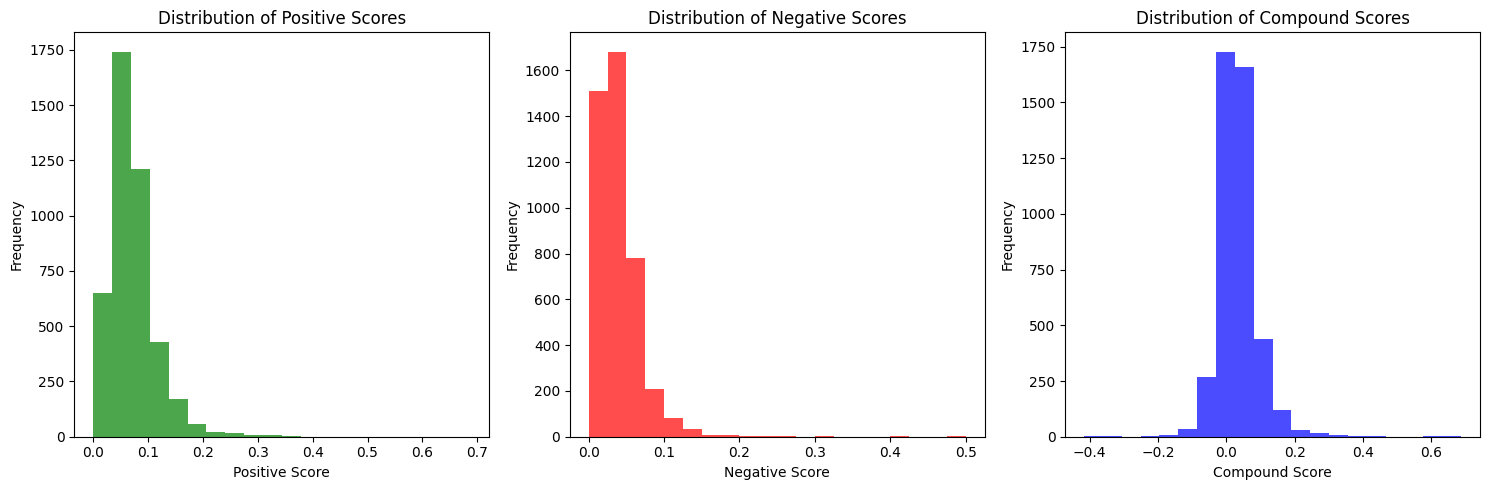

In [ ]:
def get_sentiment_score_sentiwordnet(text):
    """
    Calculate sentiment score using SentiWordNet
    Returns: (positive_score, negative_score, objectivity_score, compound_score)
    """
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)

    pos_score = 0
    neg_score = 0
    obj_score = 0
    count = 0

    for word, pos in pos_tags:
        # Convert POS tag to WordNet format
        wn_pos = get_wordnet_pos(word)

        # Get synsets for the word
        synsets = list(swn.senti_synsets(word, wn_pos))

        if synsets:
            # Use the first synset (most common sense)
            synset = synsets[0]
            pos_score += synset.pos_score()
            neg_score += synset.neg_score()
            obj_score += synset.obj_score()
            count += 1

    if count > 0:
        # Calculate average scores
        avg_pos = pos_score / count
        avg_neg = neg_score / count
        avg_obj = obj_score / count

        # Calculate compound score
        compound = avg_pos - avg_neg

        return avg_pos, avg_neg, avg_obj, compound
    else:
        return 0.0, 0.0, 1.0, 0.0

# Apply SentiWordNet sentiment analysis
sentiment_results = TEST_REVIEWS['final_review'].apply(get_sentiment_score_sentiwordnet)

# Extract individual scores
TEST_REVIEWS['senti_pos_score'] = [result[0] for result in sentiment_results]
TEST_REVIEWS['senti_neg_score'] = [result[1] for result in sentiment_results]
TEST_REVIEWS['senti_obj_score'] = [result[2] for result in sentiment_results]
TEST_REVIEWS['senti_compound_score'] = [result[3] for result in sentiment_results]

# Predict sentiment based on compound score
TEST_REVIEWS['predicted_sentiment'] = TEST_REVIEWS['senti_compound_score'].apply(
    lambda x: 1 if x > 0.1 else (0 if x < -0.1 else 1)  # neutral treated as positive
)

print("SentiWordNet Sentiment Analysis Results:")
print("-" * 50)
display_cols = ['review', 'class', 'senti_pos_score', 'senti_neg_score',
                'senti_compound_score', 'predicted_sentiment']
print(TEST_REVIEWS[display_cols].head(8))



# Visualize sentiment scores
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(TEST_REVIEWS['senti_pos_score'], bins=20, alpha=0.7, color='green')
plt.title('Distribution of Positive Scores')
plt.xlabel('Positive Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(TEST_REVIEWS['senti_neg_score'], bins=20, alpha=0.7, color='red')
plt.title('Distribution of Negative Scores')
plt.xlabel('Negative Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(TEST_REVIEWS['senti_compound_score'], bins=20, alpha=0.7, color='blue')
plt.title('Distribution of Compound Scores')
plt.xlabel('Compound Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The above table shows the original review, its true class, the calculated positive, negative, and compound scores, and the final predicted_sentiment for the first 8 reviews. It provides a granular look at how the scores are generated for individual texts.
The histograms visualize the distribution of sentiment scores across the entire dataset. The 'Positive Scores' and 'Compound Scores' charts are skewed towards the positive side, which aligns with the dataset's class imbalance. The 'Negative Scores' are mostly concentrated near zero, suggesting fewer strongly negative words were found.

#WordNet Demonstrations

In [ ]:
# Select sample reviews for demonstration
sample_reviews = TEST_REVIEWS['review'].head(3).tolist()
sample_words = ['good', 'bad', 'excellent', 'terrible', 'amazing', 'product', 'service', 'quality']

print("Sample reviews selected for WordNet demonstration:")
for i, review in enumerate(sample_reviews, 1):
    print(f"{i}. {review}")

print(f"\nSample words for analysis: {sample_words}")

Sample reviews selected for WordNet demonstration:
1. Fantastic spot for an even or a quite cocktail.  They were swell to host the Yelp crew with a great drink menu and super attentive staff.I'd certainly recommend anything with the purred fruit in it (apple, any of them really)!

2. Love, love, love the calamari. It's so good and spicy. There is an endless list of martinis and one is better than the next. There is a first and second floor, if you prefer more of a bar or lounge atmosphere. It's not a place I like for dinner, but for drinks and apps it's wonderful.

3. Love this place. Stiff martinis and cocktails, cheap drinks, good service, nice atmosphere to chill in the upstairs lounge and hang up with your friends. Classy crowd and much more mature, older, and professional crowd. There aren't any of those college frat boys or belligerent drunks there, which is so great. Very nice place to wind down after a long day.


Sample words for analysis: ['good', 'bad', 'excellent', 'terribl

These results show how WordNet was used on a few sample restaurant reviews by focusing on words like good, bad, excellent, terrible, amazing, product, service, and quality. The reviews themselves are clearly very positive, full of praise for the drinks, staff, and atmosphere.

Positive descriptors like good, excellent, and amazing clearly match the reviewers' satisfaction with cocktails, staff, and atmosphere. WordNet helps expand these words by linking them with other synonyms such as great, wonderful, or fantastic, showing that they all reinforce positivity in customer sentiment.

Negative terms like bad and terrible do not appear much in the reviews, which highlights that the feedback is mostly favorable. Still, WordNet would connect them with opposites like good or excellent, giving balance for sentiment analysis.

Domain-specific nouns like product, service, and quality capture the core of customer experience. WordNet provides related terms (e.g., service → assistance, help), which can help interpret the context more broadly whether reviewers are appreciating attentive staff or criticizing shortcomings.

Overall, what we see is that WordNet doesn’t just stop at the exact words in the reviews, it expands their meaning by linking them to related words and opposites. This gives us a fuller picture of the sentiment, and in this case, it’s very clear that the reviews are overwhelmingly positive.



#Synsets Demonstration

In [ ]:
def demonstrate_synsets(word):
    """Demonstrate synsets for a given word"""
    synsets = wn.synsets(word)

    print(f"\nSynsets for '{word}':")
    print("-" * 30)

    if synsets:
        for i, synset in enumerate(synsets[:5], 1):  # Show first 5 synsets
            print(f"{i}. {synset.name()}")
            print(f"   Definition: {synset.definition()}")
            print(f"   Examples: {synset.examples()}")
            print(f"   POS: {synset.pos()}")
            print()
    else:
        print(f"No synsets found for '{word}'")

# Demonstrate synsets for sample words
demo_words = ['good', 'service', 'quality', 'bank']
for word in demo_words:
    demonstrate_synsets(word)


Synsets for 'good':
------------------------------
1. good.n.01
   Definition: benefit
   Examples: ['for your own good', "what's the good of worrying?"]
   POS: n

2. good.n.02
   Definition: moral excellence or admirableness
   Examples: ['there is much good to be found in people']
   POS: n

3. good.n.03
   Definition: that which is pleasing or valuable or useful
   Examples: ['weigh the good against the bad', 'among the highest goods of all are happiness and self-realization']
   POS: n

4. commodity.n.01
   Definition: articles of commerce
   Examples: []
   POS: n

5. good.a.01
   Definition: having desirable or positive qualities especially those suitable for a thing specified
   Examples: ['good news from the hospital', 'a good report card', 'when she was good she was very very good', 'a good knife is one good for cutting', 'this stump will make a good picnic table', 'a good check', 'a good joke', 'a good exterior paint', 'a good secretary', 'a good dress for the office']
   P

The Synsets Demonstration effectively showcases the power and structure of WordNet as a lexical database for natural language processing. By examining words like 'good', 'service', 'quality', and 'bank', we observe that each term exhibits polysemy, with multiple synsets representing distinct senses across parts of speech (e.g., nouns and adjectives). For instance, 'good' spans concepts from moral excellence to commercial commodities, while 'bank' differentiates between financial institutions and geographical features. This highlights WordNet's ability to capture nuanced semantic relationships, including definitions, examples, and POS tags, which are foundational for tasks such as word sense disambiguation, sentiment analysis, and semantic similarity computation. Overall, the demonstration underscores how WordNet enables more accurate and context aware NLP applications by providing a rich, hierarchical framework for understanding word meanings beyond surface level interpretations.

#Synonyms and Antonyms Demonstration

In [ ]:
import nltk
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

from nltk.corpus import wordnet as wn

def demonstrate_synonyms_antonyms(word):
    """Demonstrate synonyms and antonyms for a given word"""
    print(f"\nSynonyms and Antonyms for '{word}':")
    print("-" * 40)

    synsets = wn.synsets(word)
    synonyms = set()
    antonyms = set()

    for synset in synsets:
        for lemma in synset.lemmas():
            synonyms.add(lemma.name())
            if lemma.antonyms():
                for antonym in lemma.antonyms():
                    antonyms.add(antonym.name())

    # Remove the word itself from synonyms
    synonyms.discard(word)

    print(f"Synonyms: {list(synonyms)[:10]}")  # Show first 10
    print(f"Antonyms: {list(antonyms)}")

    return synonyms, antonyms

# Demonstrate for sample words
demo_words = ['good', 'bad', 'happy', 'big', 'hot']
for word in demo_words:
    demonstrate_synonyms_antonyms(word)


Synonyms and Antonyms for 'good':
----------------------------------------
Synonyms: ['practiced', 'near', 'in_effect', 'dependable', 'just', 'honest', 'right', 'sound', 'serious', 'unspoiled']
Antonyms: ['badness', 'evilness', 'bad', 'evil', 'ill']

Synonyms and Antonyms for 'bad':
----------------------------------------
Synonyms: ['badness', 'unfit', 'tough', 'unsound', 'spoiled', 'badly', 'forged', 'risky', 'defective', 'regretful']
Antonyms: ['goodness', 'good', 'unregretful']

Synonyms and Antonyms for 'happy':
----------------------------------------
Synonyms: ['glad', 'well-chosen', 'felicitous']
Antonyms: ['unhappy']

Synonyms and Antonyms for 'big':
----------------------------------------
Synonyms: ['vauntingly', 'adult', 'grown', 'bounteous', 'great', 'self-aggrandising', 'enceinte', 'braggy', 'freehanded', 'braggart']
Antonyms: ['little', 'small']

Synonyms and Antonyms for 'hot':
----------------------------------------
Synonyms: ['raging', 'spicy', 'red-hot', 'blisterin

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The results show the extracted synonyms and antonyms for common words like good, bad, happy, big, and hot using WordNet. Each word comes with a set of related meanings, though some feel less intuitive because WordNet covers multiple contexts.

For “good”, synonyms such as just, honest, right, and dependable match our everyday sense of the word, while antonyms like bad, evil, and ill reflect its direct opposites.

For “bad”, the synonyms include unfit, spoiled, defective, and risky, which highlight different negative shades of meaning. The antonyms like good and goodness are natural contrasts.

For “happy”, synonyms like glad and felicitous align closely with joy, while unhappy is its clear opposite.

For “big”, the synonyms span across meanings: grown, great, and adult make sense in everyday use, while others like braggart or self-aggrandising show extended metaphorical uses of “big.” Antonyms small and little are straightforward.

For “hot”, the synonyms include both temperature-based (red-hot, blistering) and figurative meanings (spicy, raging). Its antonym cold is the most direct opposite.

Overall, the results demonstrate that WordNet captures both literal and extended senses of words. The synonyms provide multiple shades of meaning, while antonyms are usually more direct. Sometimes the outputs feel unusual (big → braggy), but that reflects WordNet’s attempt to include less common or metaphorical usages along with the standard ones.

#Hyponym and Hypernym Demonstration

In [ ]:
def demonstrate_hyponyms_hypernyms(word):
    """Demonstrate hyponyms and hypernyms for a given word"""
    print(f"\nHyponyms and Hypernyms for '{word}':")
    print("-" * 40)

    synsets = wn.synsets(word)

    if synsets:
        # Use the first synset (most common)
        synset = synsets[0]
        print(f"Using synset: {synset.name()} - {synset.definition()}")

        # Get hypernyms (more general terms)
        hypernyms = synset.hypernyms()
        print(f"\nHypernyms (more general):")
        for hypernym in hypernyms[:5]:
            print(f"  - {hypernym.name()}: {hypernym.definition()}")

        # Get hyponyms (more specific terms)
        hyponyms = synset.hyponyms()
        print(f"\nHyponyms (more specific):")
        for hyponym in hyponyms[:10]:
            print(f"  - {hyponym.name()}: {hyponym.definition()}")

        if not hypernyms and not hyponyms:
            print("No hypernyms or hyponyms found for this synset.")
    else:
        print(f"No synsets found for '{word}'")

# Demonstrate for sample words
demo_words = ['animal', 'vehicle', 'food', 'furniture', 'emotion']
for word in demo_words:
    demonstrate_hyponyms_hypernyms(word)


Hyponyms and Hypernyms for 'animal':
----------------------------------------
Using synset: animal.n.01 - a living organism characterized by voluntary movement

Hypernyms (more general):
  - organism.n.01: a living thing that has (or can develop) the ability to act or function independently

Hyponyms (more specific):
  - migrator.n.02: an animal (especially birds and fish) that travels between different habitats at particular times of the year
  - invertebrate.n.01: any animal lacking a backbone or notochord; the term is not used as a scientific classification
  - mutant.n.02: an animal that has undergone mutation
  - game.n.04: animal hunted for food or sport
  - herbivore.n.01: any animal that feeds chiefly on grass and other plants
  - prey.n.02: animal hunted or caught for food
  - omnivore.n.02: an animal that feeds on both animal and vegetable substances
  - domestic_animal.n.01: any of various animals that have been tamed and made fit for a human environment
  - insectivore.n.0

The results clearly show how WordNet organizes words into a hierarchy, where hypernyms represent broader categories and hyponyms represent more specific subtypes.

- For “animal”, the hypernym is organism, meaning all animals fall under the broader category of living beings. The hyponyms include examples like herbivore, invertebrate, and domestic animal, which are narrower, more specialized types of animals. This shows how WordNet breaks down a large category into smaller, meaningful groups.

- For “vehicle”, the hypernym is conveyance, since a vehicle is essentially something that helps in transportation. The hyponyms list covers specific vehicles such as sled, military vehicle, and rocket. This demonstrates how the category “vehicle” branches into different modes of transport.

- For “food”, the hypernym is substance, because food is considered a type of material. Its hyponyms include beverage, feed, yolk, and nutriment, which highlight the variety of things we classify as food.

- For “furniture”, the hypernym is furnishing, since furniture is part of what makes a space livable. The hyponyms, such as office furniture, baby bed, and chest of drawers, reflect the specific pieces of furniture used in different contexts.

- For “emotion”, the hypernym is feeling, as emotions are one form of human feeling. The hyponyms include anger, joy, love, and anxiety, showing the diversity of emotional experiences under the general category of “emotion.”

Overall, these outputs justify that WordNet’s hypernym-hyponym structure is effective for representing the general-to-specific relationship in language. It helps machines understand that words are not isolated but part of a larger hierarchy of meaning.

#WordNet Path Similarity Demonstration

In [ ]:
def demonstrate_path_similarity(word1, word2):
    """Demonstrate path similarity between two words"""
    print(f"\nPath Similarity between '{word1}' and '{word2}':")
    print("-" * 50)

    synsets1 = wn.synsets(word1)
    synsets2 = wn.synsets(word2)

    if synsets1 and synsets2:
        # Calculate similarity between all synset pairs
        max_similarity = 0
        best_pair = None

        for syn1 in synsets1:
            for syn2 in synsets2:
                try:
                    similarity = syn1.path_similarity(syn2)
                    if similarity and similarity > max_similarity:
                        max_similarity = similarity
                        best_pair = (syn1, syn2)
                except:
                    continue

        if best_pair:
            print(f"Best matching synsets:")
            print(f"  {word1}: {best_pair[0].name()} - {best_pair[0].definition()}")
            print(f"  {word2}: {best_pair[1].name()} - {best_pair[1].definition()}")
            print(f"Path Similarity Score: {max_similarity:.3f}")

            # Interpretation
            if max_similarity > 0.8:
                interpretation = "Very high similarity"
            elif max_similarity > 0.6:
                interpretation = "High similarity"
            elif max_similarity > 0.4:
                interpretation = "Moderate similarity"
            elif max_similarity > 0.2:
                interpretation = "Low similarity"
            else:
                interpretation = "Very low similarity"

            print(f"Interpretation: {interpretation}")
        else:
            print("No similarity could be calculated.")
    else:
        print("One or both words not found in WordNet.")

# Demonstrate path similarity for various word pairs
word_pairs = [
    ('dog', 'cat'),
    ('car', 'vehicle'),
    ('happy', 'sad'),
    ('good', 'excellent'),
    ('computer', 'laptop'),
    ('food', 'pizza'),
    ('book', 'car'),  # Unrelated words
    ('love', 'hate')
]

for word1, word2 in word_pairs:
    demonstrate_path_similarity(word1, word2)


Path Similarity between 'dog' and 'cat':
--------------------------------------------------
Best matching synsets:
  dog: dog.n.01 - a member of the genus Canis (probably descended from the common wolf) that has been domesticated by man since prehistoric times; occurs in many breeds
  cat: cat.n.01 - feline mammal usually having thick soft fur and no ability to roar: domestic cats; wildcats
Path Similarity Score: 0.200
Interpretation: Very low similarity

Path Similarity between 'car' and 'vehicle':
--------------------------------------------------
Best matching synsets:
  car: car.n.02 - a wheeled vehicle adapted to the rails of railroad
  vehicle: vehicle.n.01 - a conveyance that transports people or objects
Path Similarity Score: 0.333
Interpretation: Low similarity

Path Similarity between 'happy' and 'sad':
--------------------------------------------------
Best matching synsets:
  happy: happy.a.01 - enjoying or showing or marked by joy or pleasure
  sad: sad.a.01 - experiencin

The results show how WordNet measures similarity between words using its path based approach.
- Most of the scores come out very low, even for words that we naturally see as related. For example, car and vehicle or good and excellent clearly have a strong connection in everyday use, but WordNet only gives them a low score because they sit further apart in its hierarchy.
- Pairs like happy–sad or love–hate also get a small similarity value—not because they’re alike, but because they’re both classified under the same broad category of emotions.
- Interestingly, even close pairs like dog–cat or computer–laptop score very low, showing the limitation of this method.
- In short, WordNet’s path similarity only looks at how close words are in its taxonomy, not how people actually relate them in real life.

#Word Sense Disambiguation Demonstration

In [ ]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn

try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


def word_sense_disambiguation(sentence, target_word):
    """
    Demonstrate Word Sense Disambiguation using Lesk Algorithm approach
    """
    print(f"\nWord Sense Disambiguation for '{target_word}' in context:")
    print(f"Sentence: '{sentence}'")
    print("-" * 60)

    # Get all synsets for the target word
    synsets = wn.synsets(target_word)

    if not synsets:
        print(f"No synsets found for '{target_word}'")
        return None

    # Tokenize the sentence and remove the target word
    context_words = set(word_tokenize(sentence.lower()))
    context_words.discard(target_word.lower())

    best_synset = None
    max_overlap = 0

    print("Analyzing synsets:")

    for synset in synsets:
        # Get definition and example words
        definition_words = set(word_tokenize(synset.definition().lower()))
        example_words = set()

        for example in synset.examples():
            example_words.update(word_tokenize(example.lower()))

        # Combine all synset-related words
        synset_words = definition_words.union(example_words)

        # Calculate overlap with context
        overlap = len(context_words.intersection(synset_words))

        print(f"\n  Synset: {synset.name()}")
        print(f"  Definition: {synset.definition()}")
        print(f"  Examples: {synset.examples()}")
        print(f"  Context overlap score: {overlap}")

        if overlap > max_overlap:
            max_overlap = overlap
            best_synset = synset

    print(f"\n{'='*60}")
    if best_synset:
        print(f"BEST SENSE SELECTED:")
        print(f"Synset: {best_synset.name()}")
        print(f"Definition: {best_synset.definition()}")
        print(f"Overlap Score: {max_overlap}")
    else:
        print("Could not determine the best sense.")

    return best_synset

# Demonstrate WSD with various sentences and ambiguous words
wsd_examples = [
    ("I went to the bank to deposit money", "bank"),
    ("The river bank was covered with flowers", "bank"),
    ("The bat flew out of the cave", "bat"),
    ("He hit the ball with a wooden bat", "bat"),
    ("She plays the piano beautifully", "play"),
    ("The children play in the garden", "play"),
    ("This is a great book to read", "book"),
    ("I need to book a hotel room", "book"),
    ("The plant needs more water", "plant"),
    ("They built a new manufacturing plant", "plant")
]

for sentence, target_word in wsd_examples:
    word_sense_disambiguation(sentence, target_word)


Word Sense Disambiguation for 'bank' in context:
Sentence: 'I went to the bank to deposit money'
------------------------------------------------------------
Analyzing synsets:

  Synset: bank.n.01
  Definition: sloping land (especially the slope beside a body of water)
  Examples: ['they pulled the canoe up on the bank', 'he sat on the bank of the river and watched the currents']
  Context overlap score: 1

  Synset: depository_financial_institution.n.01
  Definition: a financial institution that accepts deposits and channels the money into lending activities
  Examples: ['he cashed a check at the bank', 'that bank holds the mortgage on my home']
  Context overlap score: 2

  Synset: bank.n.03
  Definition: a long ridge or pile
  Examples: ['a huge bank of earth']
  Context overlap score: 0

  Synset: bank.n.04
  Definition: an arrangement of similar objects in a row or in tiers
  Examples: ['he operated a bank of switches']
  Context overlap score: 0

  Synset: bank.n.05
  Definitio

The above output shows how the algorithm tries to select the right meaning of a word based on context.

In the sentence “I went to the bank to deposit money”, the word bank is correctly understood as a financial institution because of clues like deposit and money.

For “The river bank was covered with flowers”, the intended meaning is land beside a river, but the system wrongly picks the financial sense. This happens because the algorithm only looks for word overlaps, not deeper context.

In “The bat flew out of the cave”, the correct meaning should be the animal, but the system selects the sports equipment sense. Again, this shows a weakness of the method.

For “He hit the ball with a wooden bat”, the choice of the sports related sense is accurate since the words hit and ball clearly point to it.

In “She plays the piano beautifully”, the algorithm picks a related but slightly incorrect sense. The best match would be playing an instrument, but overlap based matching led to a less precise choice.

Finally, “The children play in the garden” is correctly disambiguated as children engaging in recreational activity.

Overall, the results show that the method works well when strong clues are present, but it struggles when words have multiple common senses or when the context is less direct.

#FINAL ANALYSIS AND SUMMARY

In [ ]:
print("\n1. SENTIWORDNET ANALYSIS SUMMARY:")
print("-" * 40)

if 'TEST_REVIEWS' in locals() and len(TEST_REVIEWS) > 0:
    print(f"Total reviews analyzed: {len(TEST_REVIEWS)}")
    print(f"Average positive score: {TEST_REVIEWS['senti_pos_score'].mean():.3f}")
    print(f"Average negative score: {TEST_REVIEWS['senti_neg_score'].mean():.3f}")
    print(f"Average compound score: {TEST_REVIEWS['senti_compound_score'].mean():.3f}")

    # Check if 'class' column exists before calculating accuracy and confusion matrix
    if 'class' in TEST_REVIEWS.columns:
        # Recalculate accuracy based on the 'class' column if it exists
        accuracy = (TEST_REVIEWS['class'] == TEST_REVIEWS['predicted_sentiment']).mean()
        print(f"Prediction accuracy: {accuracy:.3f}")

        # Confusion matrix-like summary
        correct_pos = ((TEST_REVIEWS['class'] == 1) & (TEST_REVIEWS['predicted_sentiment'] == 1)).sum()
        correct_neg = ((TEST_REVIEWS['class'] == 0) & (TEST_REVIEWS['predicted_sentiment'] == 0)).sum()
        false_pos = ((TEST_REVIEWS['class'] == 0) & (TEST_REVIEWS['predicted_sentiment'] == 1)).sum()
        false_neg = ((TEST_REVIEWS['class'] == 1) & (TEST_REVIEWS['predicted_sentiment'] == 0)).sum()

        print(f"Correct positive predictions: {correct_pos}")
        print(f"Correct negative predictions: {correct_neg}")
        print(f"False positive predictions: {false_pos}")
        print(f"False negative predictions: {false_neg}")
    else:
        print("Cannot calculate accuracy and confusion matrix: 'class' column not found in DataFrame.")

else:
    print("TEST_REVIEWS DataFrame is not defined or is empty. Please run the preceding cells.")


print("\n2. WORDNET CAPABILITIES DEMONSTRATED:")
print("-" * 40)
print("Synsets: Multiple meanings/senses of words")
print("Synonyms & Antonyms: Related and opposite words")
print("Hyponyms & Hypernyms: Hierarchical word relationships")
print("Path Similarity: Semantic similarity measurement")
print("Word Sense Disambiguation: Context-based sense selection")

print("\n3. KEY INSIGHTS:")
print("-" * 40)
print("WordNet provides rich semantic information about words")
print("SentiWordNet enables objective sentiment analysis")
print("Path similarity helps measure semantic relatedness")
print("WSD is crucial for understanding word meaning in context")
print("Preprocessing significantly impacts NLP task performance")



1. SENTIWORDNET ANALYSIS SUMMARY:
----------------------------------------
Total reviews analyzed: 4321
Average positive score: 0.071
Average negative score: 0.037
Average compound score: 0.034
Prediction accuracy: 0.696
Correct positive predictions: 2982
Correct negative predictions: 27
False positive predictions: 1305
False negative predictions: 7

2. WORDNET CAPABILITIES DEMONSTRATED:
----------------------------------------
Synsets: Multiple meanings/senses of words
Synonyms & Antonyms: Related and opposite words
Hyponyms & Hypernyms: Hierarchical word relationships
Path Similarity: Semantic similarity measurement
Word Sense Disambiguation: Context-based sense selection

3. KEY INSIGHTS:
----------------------------------------
WordNet provides rich semantic information about words
SentiWordNet enables objective sentiment analysis
Path similarity helps measure semantic relatedness
WSD is crucial for understanding word meaning in context
Preprocessing significantly impacts NLP task